<a href="https://colab.research.google.com/github/DavChing/programa-python_utec/blob/main/Modulo3/David_Ching_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

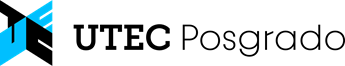


# **Módulo 3** - Sesión 5:  **Viualización de Datos Cuantitativos**
## Profesor: Germain Garcia Zanabria

### Indicaciones

Completa las secciones de código en las que se indique `### Completar`. Siga las instrucciones y proporcione la implementación adecuada en cada caso. Si necesitas ayuda o tienes alguna pregunta, no dudes en levantar la mano para que pueda asistirte.

**Nota:**
No olvides completar con tu análisis en las secciones: `La interpretación de tu gráfico anterior`.

## **Assignment:** Análisis Visual

El objetivo de este assignment es prácticar las técnicas de análisis exploratorio de datos para análisis univariado.

### **Paso 0:** Cargar librerías y seleccionar el conjunto de datos que se utilizará para este assignment.

In [ ]:
#Importar Librerias
import pandas as pd
import seaborn as sns
import random

La función `cargarDatos()` escogerá al azar el conjunto de datos (dataset) con el que trabajarás en este assignment. Además la función ya te devuelve el dataset cargado en la variable `df`

In [ ]:
def cargarDatos():
  datasetList = ["taxis", "flights", "planets"]
  rand_idx = random.randrange(len(datasetList))
  random_dataset = datasetList[rand_idx]
  print("El dataset que utilizarás es: ", random_dataset)
  df = sns.load_dataset(random_dataset)
  return df

In [ ]:
#Asigna el dataset al azar y carga el dataset
df= cargarDatos()
df.head()

El dataset que utilizarás es:  flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### **Paso 1:** Descubre/Explora el conjunto de datos

In [ ]:
#Resumen del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### **Ejercicio 1:** Método gráfico de un dato categórico ✋

Analiza de manera gráfica un dato categórico de tu dataset.

/tmp/ipython-input-15-1878990781.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pasajeros_mensual = df.groupby('month')['passengers'].sum().reset_index()


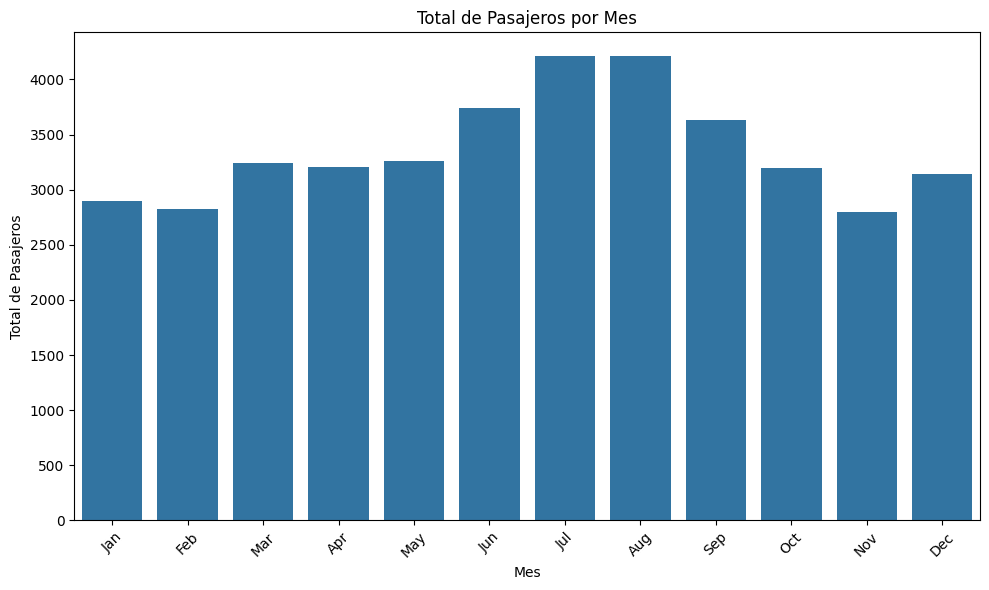

In [ ]:
# La columna mes (month) va ser el dato categorico
import matplotlib.pyplot as plt # Import matplotlib

if 'month' in df.columns and df['month'].dtype.name == 'category':
    # Agrupacion de pasajeros por mes
    pasajeros_mensual = df.groupby('month')['passengers'].sum().reset_index()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='month', y='passengers', data=pasajeros_mensual)
    plt.title('Total de Pasajeros por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Total de Pasajeros')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**La interpretación de tu gráfico anterior:**
#Los meses con mas pasajeros son los meses de junio, julio y agosto, siendo julio y agosto los de mayor tendencia al alza




### **Ejercicio 2:** Método gráfico de un dato cuantitativo ✋

Analiza de manera gráfica un dato cuantitativo de tu dataset.

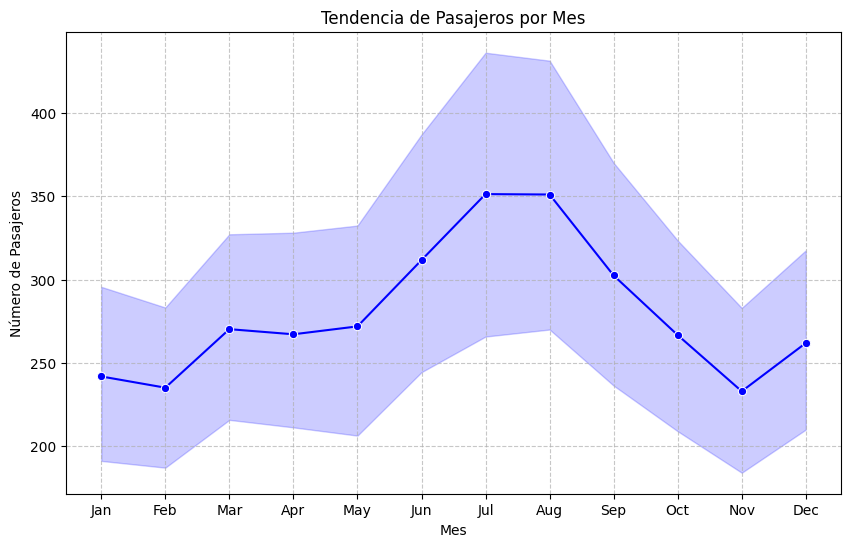

In [ ]:
# Gráfico de línea para ver la tendencia mensual
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='passengers', data=df, marker='o', color='b')
plt.title('Tendencia de Pasajeros por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Pasajeros')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-18-2416157426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='month', y='passengers', data=df, palette='coolwarm')


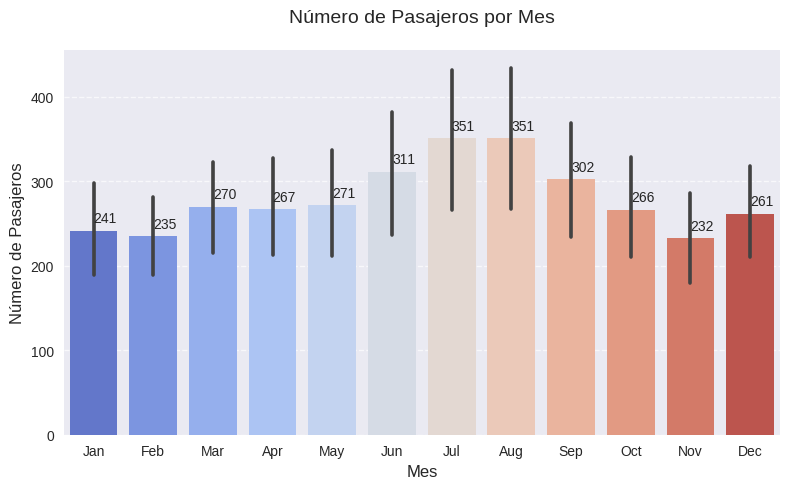

In [ ]:
# Configuración del estilo
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 5))

# Crear el gráfico de barras
ax = sns.barplot(x='month', y='passengers', data=df, palette='coolwarm')

# Personalización del gráfico
plt.title('Número de Pasajeros por Mes', fontsize=14, pad=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)

# Añadir etiquetas con los values on each bar
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

# Añadir grid y ajustar diseño
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**La interpretación de tu gráfico anterior:En los meses de mas pasajeros la media es de 351 se comparte los esa tendencia en julio y agosto


### **Ejercicio 3**: Método gráfico multivariado para datos cuantitativos ✋


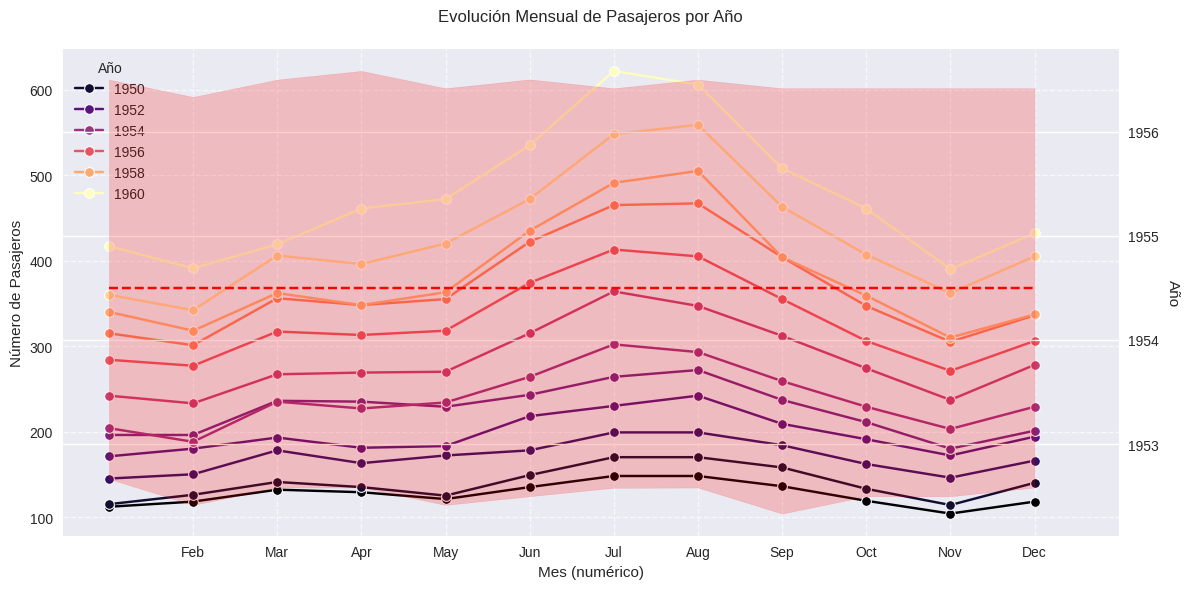

In [ ]:
plt.figure(figsize=(12,6))

# Gráfico principal de pasajeros
ax1 = sns.lineplot(x='month', y='passengers',
                  hue='year', data=df,
                  marker='o', palette='magma')

# Segundo eje para tendencia anual
ax2 = ax1.twinx()
sns.lineplot(x='month', y='year', data=df,
             color='red', linestyle='--', ax=ax2)

# Personalizando
ax1.set_title('Evolución Mensual de Pasajeros por Año', pad=20)
ax1.set_xlabel('Mes (numérico)')
ax1.set_ylabel('Número de Pasajeros')
ax2.set_ylabel('Año', rotation=270, labelpad=15)
ax1.legend(title='Año', loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()


**La interpretación de tu gráfico anterior:En lo largo de 10 años (de 1950 a 1960) la tendencia de pasajeros fue al alza, se indica que los meses de mayor demanda fueron los meses de junio, julio y agosto, se presume que por tendendia estacional la media corresponde a 351 pasajeros.
